In [1]:
import os
os.chdir("..")

In [2]:
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/alexander/miniconda3/envs/uncertainty_prediction/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def ds_name_to_meta_info(name: str):
    if "voest" in name:
        return {"n_features": 42, "n_samples": 35001}
    if "star" in name:
        return {"n_features": 39, "n_samples": 2161}
    if "meps_21" in name:
        return {"n_features": 139, "n_samples": 15785}
    if "meps_20" in name:
        return {"n_features": 139, "n_samples": 17541}
    if "meps_19" in name:
        return {"n_features": 139, "n_samples": 15656}
    if "concrete" in name:
        return {"n_features": 8, "n_samples": 1030}
    if "facebook_1" in name:
        return {"n_features": 53, "n_samples": 40948}
    if "facebook_2" in name:
        return {"n_features": 53, "n_samples": 81311}
    if "bio" in name:
        return {"n_features": 9, "n_samples": 45730}
    if "blog" in name:
        return {"n_features": 280, "n_samples": 52397}
    if "bike" in name:
        return {"n_features": 18, "n_samples": 10886}
    if "community" in name:
        return {"n_features": 100, "n_samples": 1994}
    if "gmm_2_10000" in name:
        return {"n_features": 2, "n_samples": 14000}
    return {"n_features": 0, "n_samples": 0}

In [4]:
trial_data = []
base_path = "runs_data_for_analysis/"
for file in os.listdir(base_path):
    if file.endswith(".db"):
        try:
            study_name = "cde_conformal_pred_fixed_" + file[:-3] + "_split0"
            print(f"loading study {study_name}")
            study = optuna.load_study(
                study_name=None,
                storage="sqlite:///"+ base_path + file,
            )
            trials = study.trials
            for trial in trials:
                additional = {}
                if "metrics" in trial.user_attrs:
                    additional.update(trial.user_attrs["metrics"])
                additional.update(trial.params)
                trial_data.append(
                    {
                        "file": file,
                        "model_type": file[:3],
                        "value": trial.value,
                        "state": trial.state,
                        "number": trial.number,
                        **ds_name_to_meta_info(file),
                        **additional,#unfold the dictionary
                        #"distributions": trial.distributions,
                        #"params_in_internal_repr": trial.params_in_internal_repr,
                        #"value_in_internal_repr": trial.value_in_internal_repr,
                        #"state": trial.state,
                    }
                )
        except KeyError as e:
            print(file, "invalid", e)
            continue

loading study cde_conformal_pred_fixed_kmn_bio_optuna_split0


[I 2024-03-20 13:49:35,983] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_bio_conformal_split0' because that was the only study found in the storage.
[I 2024-03-20 13:49:37,251] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_blog_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_kmn_blog_optuna_split0


[I 2024-03-20 13:49:42,072] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_concrete_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_kmn_concrete_optuna_split0


[I 2024-03-20 13:49:43,406] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_gmm_2_10000_synthetic_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_kmn_gmm_2_10000_optuna_split0
loading study cde_conformal_pred_fixed_kmn_meps_21_optuna_split0


[I 2024-03-20 13:49:46,106] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_meps_21_conformal_split0' because that was the only study found in the storage.
[I 2024-03-20 13:49:47,258] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_star_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_kmn_star_optuna_split0
loading study cde_conformal_pred_fixed_kmn_voest_ideal_optuna_split0


[I 2024-03-20 13:49:50,131] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_voest_ideal_voest_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_kmn_voest_realistic_optuna_split0


[I 2024-03-20 13:49:52,898] Study name was omitted but trying to load 'cde_conformal_pred_fixed_kmn_voest_realistic_voest_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_bio_optuna_split0


[I 2024-03-20 13:49:55,952] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_bio_conformal_split0' because that was the only study found in the storage.
[I 2024-03-20 13:49:57,056] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_blog_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_blog_optuna_split0
loading study cde_conformal_pred_fixed_mdn_concrete_optuna_split0


[I 2024-03-20 13:49:59,962] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_concrete_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_meps_21_optuna_split0


[I 2024-03-20 13:50:02,418] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_meps_21_conformal_split0' because that was the only study found in the storage.
[I 2024-03-20 13:50:03,561] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_star_conformal_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_star_optuna_split0


[I 2024-03-20 13:50:04,974] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_voest_ideal_voest_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_voest_ideal_optuna_split0


[I 2024-03-20 13:50:08,625] Study name was omitted but trying to load 'cde_conformal_pred_fixed_mdn_voest_realistic_voest_split0' because that was the only study found in the storage.


loading study cde_conformal_pred_fixed_mdn_voest_realistic_optuna_split0


In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.DataFrame(trial_data)
hyperparam_cols = [col for col in df.columns[5:] if "[" in col] #filter out the hyperparameters
print(hyperparam_cols)
df

["['training_hyperparameters', 'noisy_start', 'choose']", "['training_hyperparameters', 'clip_gradient_norm', 'rangetunefloat']", "['training_hyperparameters', 'batch_size', 'logtuneint']", "['training_hyperparameters', 'optimizer_hyperparameters', 'lr', 'logtunefloat']", "['training_hyperparameters', 'input_noise_x', 'rangetunefloat']", "['training_hyperparameters', 'input_noise_y', 'rangetunefloat']", "['training_hyperparameters', 'loss_hyperparameters', 'reliability_loss_weight', 'rangetunefloat']", "['training_hyperparameters', 'loss_hyperparameters', 'gumbel_tau', 'logtunefloat']", "['training_hyperparameters', 'loss_hyperparameters', 'sigmoid_steepness', 'logtunefloat']", "['training_hyperparameters', 'loss_hyperparameters', 'weights_entropy_loss_weight', 'rangetunefloat']", "['training_hyperparameters', 'noise_level', 'rangetunefloat']", "['training_hyperparameters', 'noise_decay', 'rangetunefloat']", "['model_hyperparameters', 'n_hidden', 'tune']", "['model_hyperparameters', 'd

file model_type     value  state  number  \
0                  kmn_bio_optuna.db        kmn  2.929329      1       0   
1                  kmn_bio_optuna.db        kmn  2.772050      1       1   
2                  kmn_bio_optuna.db        kmn  2.692833      1       2   
3                  kmn_bio_optuna.db        kmn  2.986534      1       3   
4                  kmn_bio_optuna.db        kmn  2.414810      1       4   
...                              ...        ...       ...    ...     ...   
15890  mdn_voest_realistic_optuna.db        mdn  5.464105      1    1062   
15891  mdn_voest_realistic_optuna.db        mdn  5.440240      1    1063   
15892  mdn_voest_realistic_optuna.db        mdn  5.438074      1    1064   
15893  mdn_voest_realistic_optuna.db        mdn  5.420653      1    1065   
15894  mdn_voest_realistic_optuna.db        mdn  5.449370      1    1066   

       n_features  n_samples  best_val_mean_weights  best_val_std_weights  \
0               9      45730               0.020833              0.009566   
1               9      45730               0.083333              0.032632   
2               9      45730               0.005495              0.002984   
3               9      45730               0.009804              0.003809   
4               9      45730               0.008333              0.004847   
...           ...        ...                    ...                   ...   
15890          42      35001               0.028571              0.008463   
15891          42      35001               0.030303              0.006950   
15892          42      35001               0.031250              0.005199   
15893          42      35001               0.032258              0.006040   
15894          42      35001               0.030303              0.013228   

       best_val_nll_loss  best_val_nll_loss_normalized  \
0               2.929329                      1.117602   
1               2.772050                      0.960323   
2               2.692833                      0.881107   
3               2.986534                      1.174808   
4               2.414810                      0.603083   
...                  ...                           ...   
15890           5.464105                     -0.563794   
15891           5.440240                     -0.587658   
15892           5.438074                     -0.589825   
15893           5.420653                     -0.607246   
15894           5.449370                     -0.578528   

       best_val_weights_entropy  best_val_misclibration_area  \
0                      3.781483                     0.109636   
1                      2.415055                     0.096668   
2                      5.061578                     0.111679   
3                      4.554729                     0.097134   
4                      4.651338                     0.103327   
...                         ...                          ...   
15890                  3.509500                     0.059691   
15891                  3.468029                     0.077281   
15892                  3.451198                     0.068567   
15893                  3.414752                     0.067202   
15894                  3.413567                     0.065662   

       best_val_miscalibration0part  best_val_miscalibration1part  \
0                          0.080188                      0.090024   
1                          0.077688                      0.087593   
2                          0.050563                      0.055732   
3                          0.084188                      0.095192   
4                          0.077969                      0.085611   
...                             ...                           ...   
15890                      0.168875                      0.191513   
15891                      0.168437                      0.192303   
15892                      0.191250                      0.211822   
15893                      0.167844   

In [6]:
# Normalize the 'value' column which contains scores
df['normalized_score'] = df.groupby('file')['value'].transform(lambda x: (x - x.mean()) / x.std())


In [7]:
df['normalized_score'] = df.groupby('file')['value'].transform(lambda x: (x - x.mean()) / x.std())

In [9]:
df_mdn = df[df['model_type'] == 'mdn']
df_kmn = df[df['model_type'] == 'kmn']

Correlation matrices for mdn


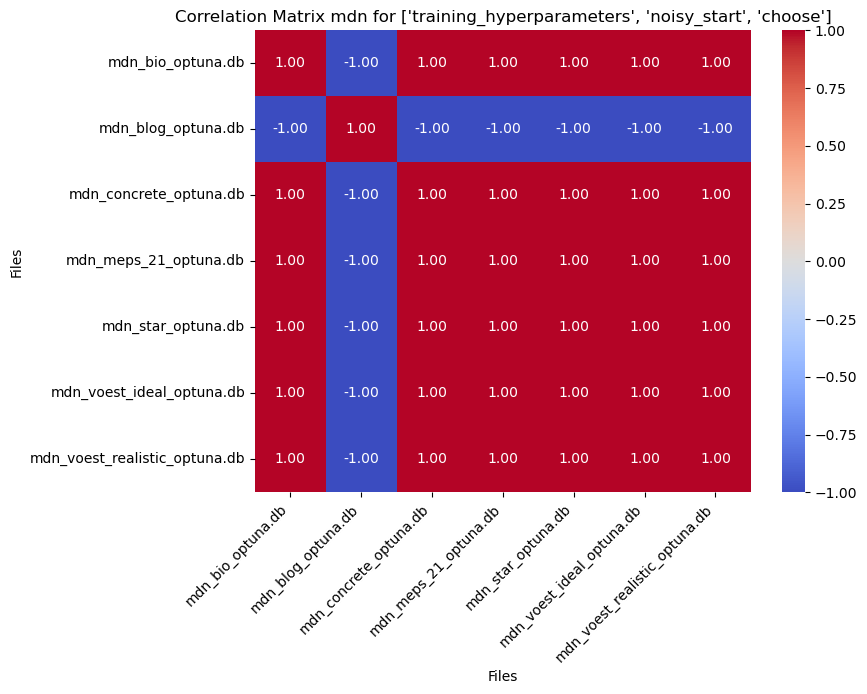

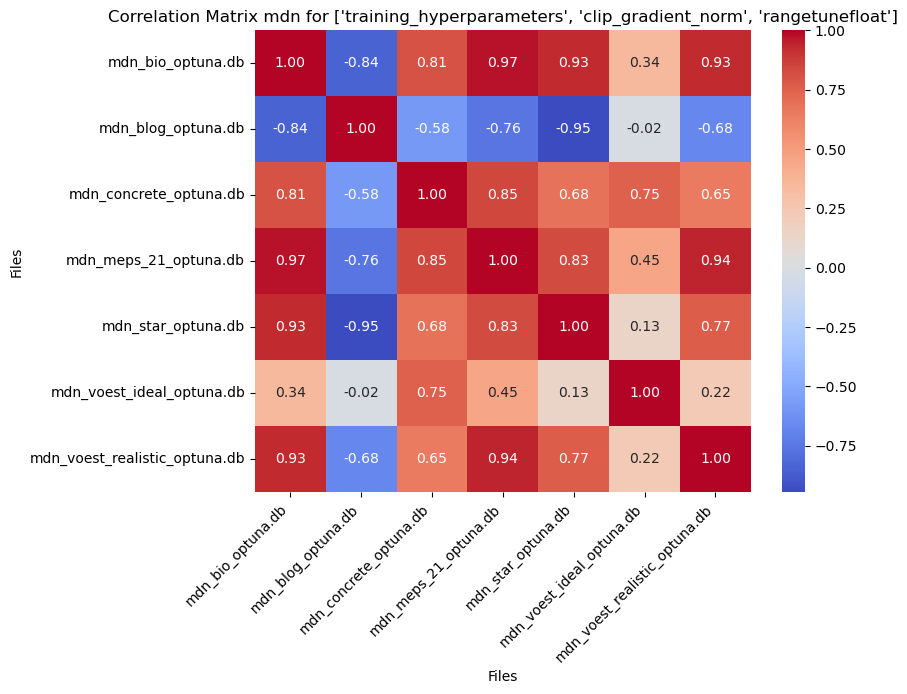

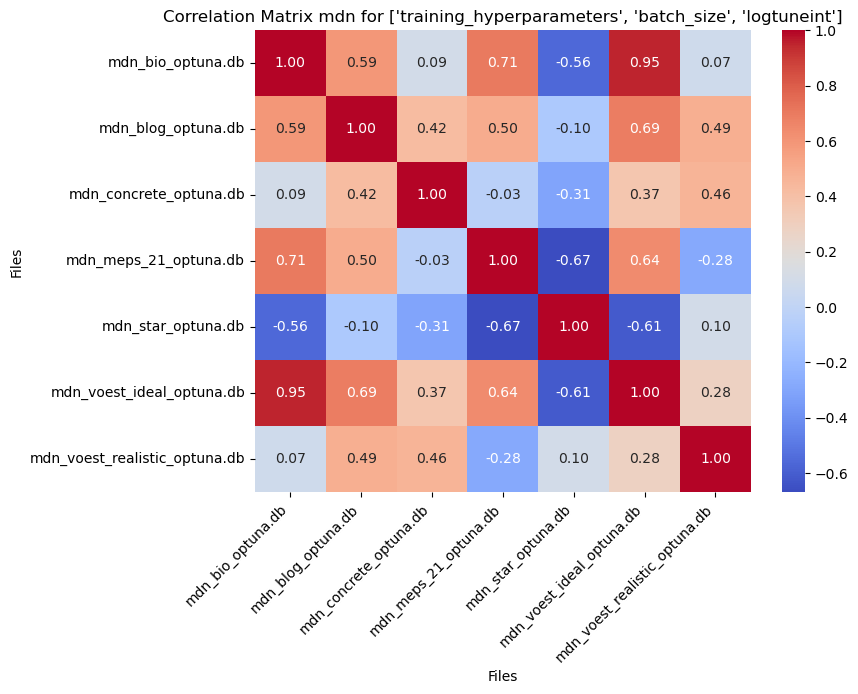

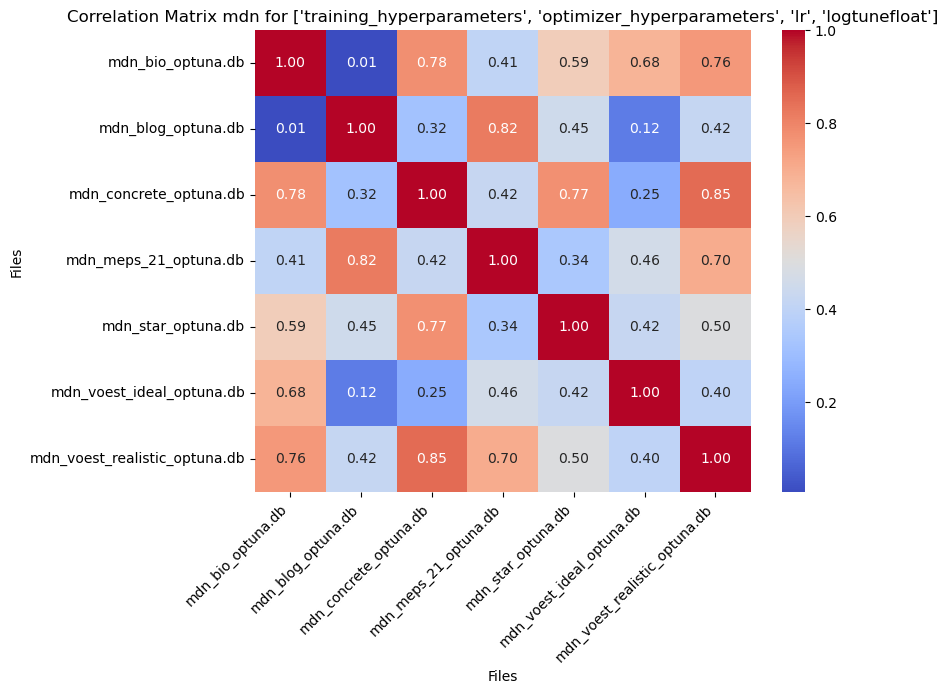

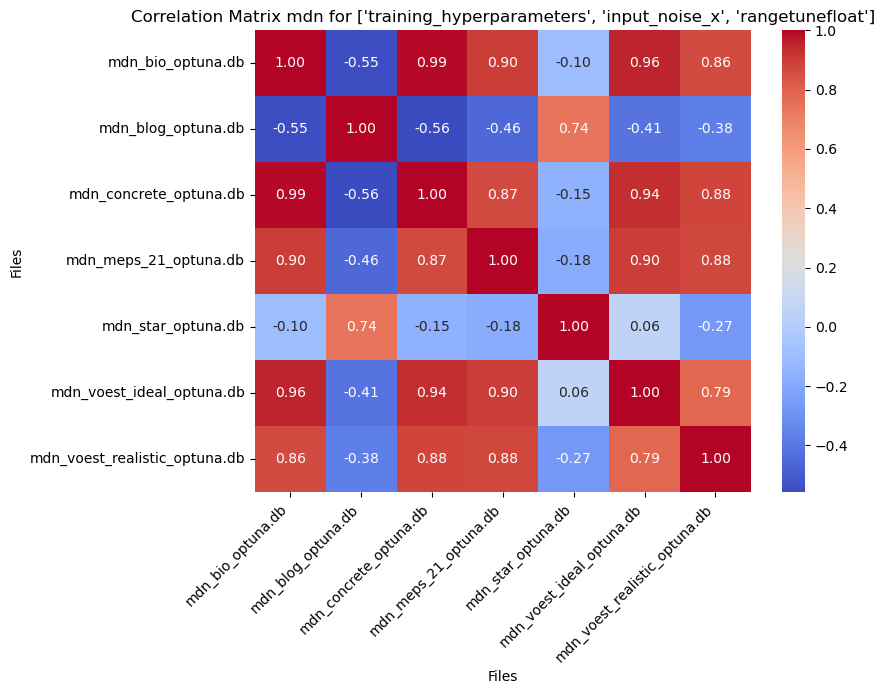

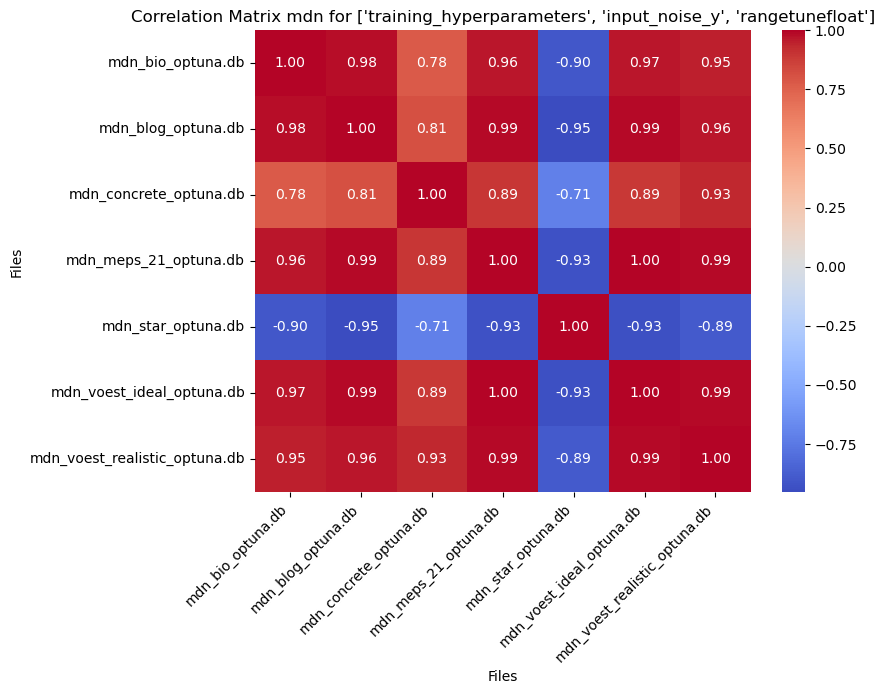

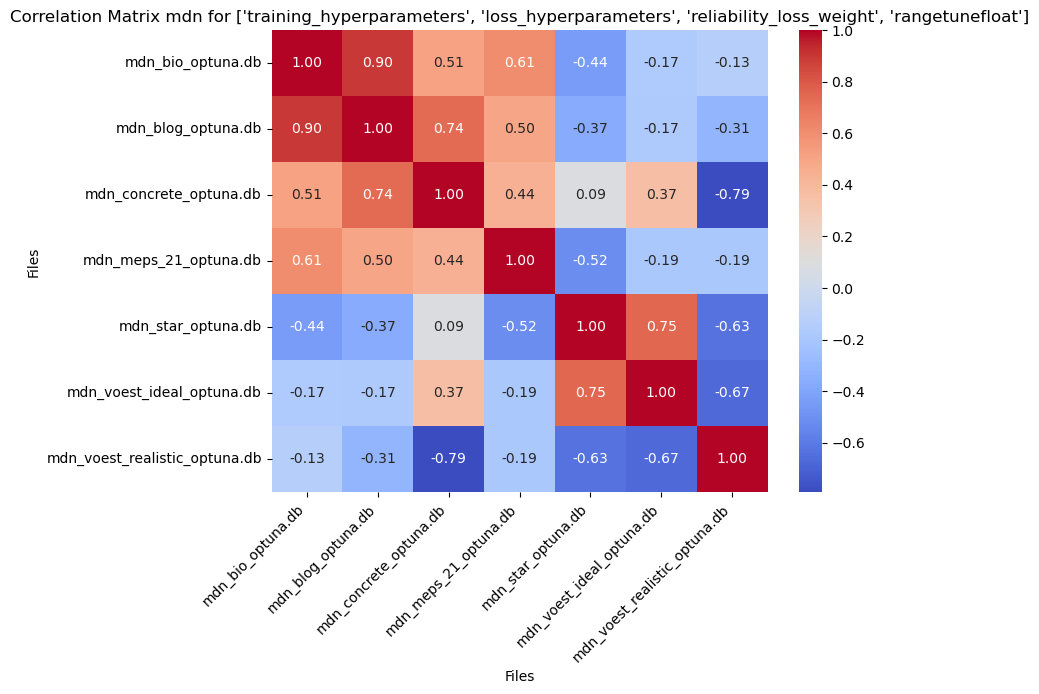

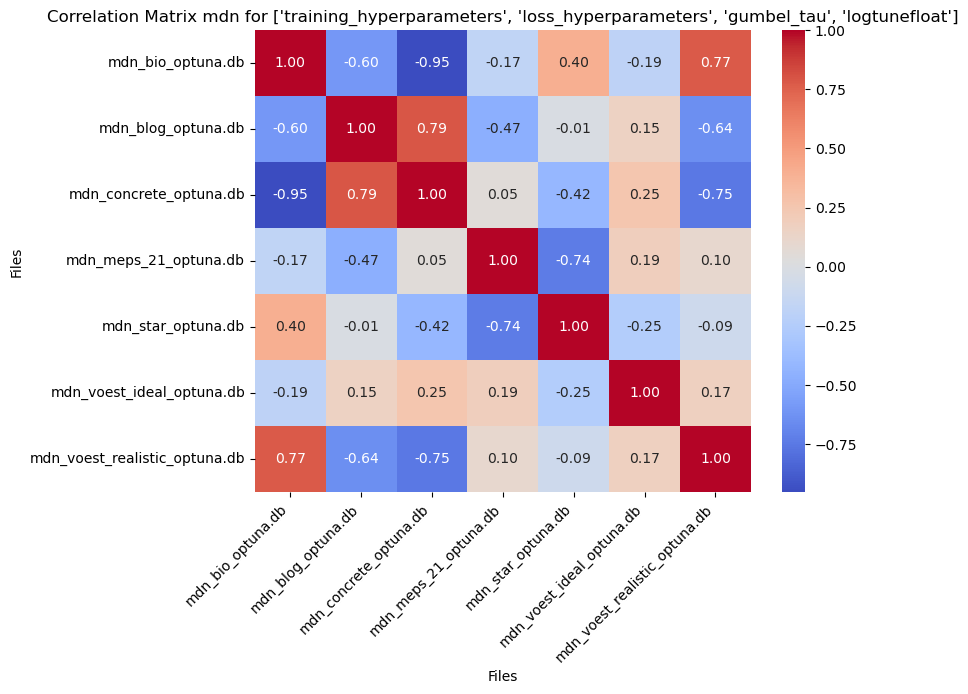

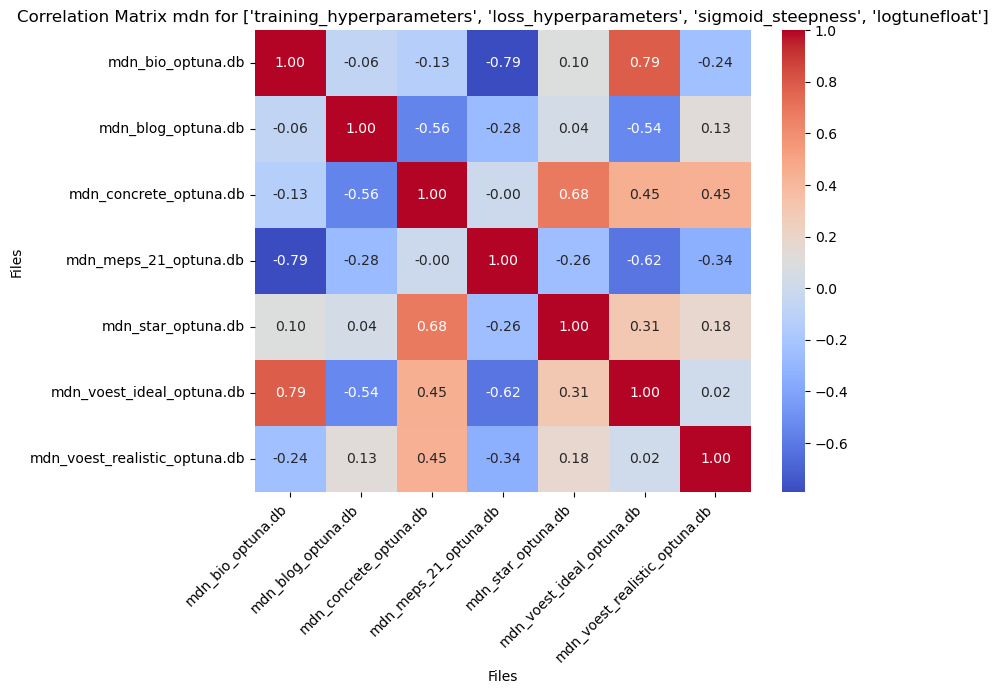

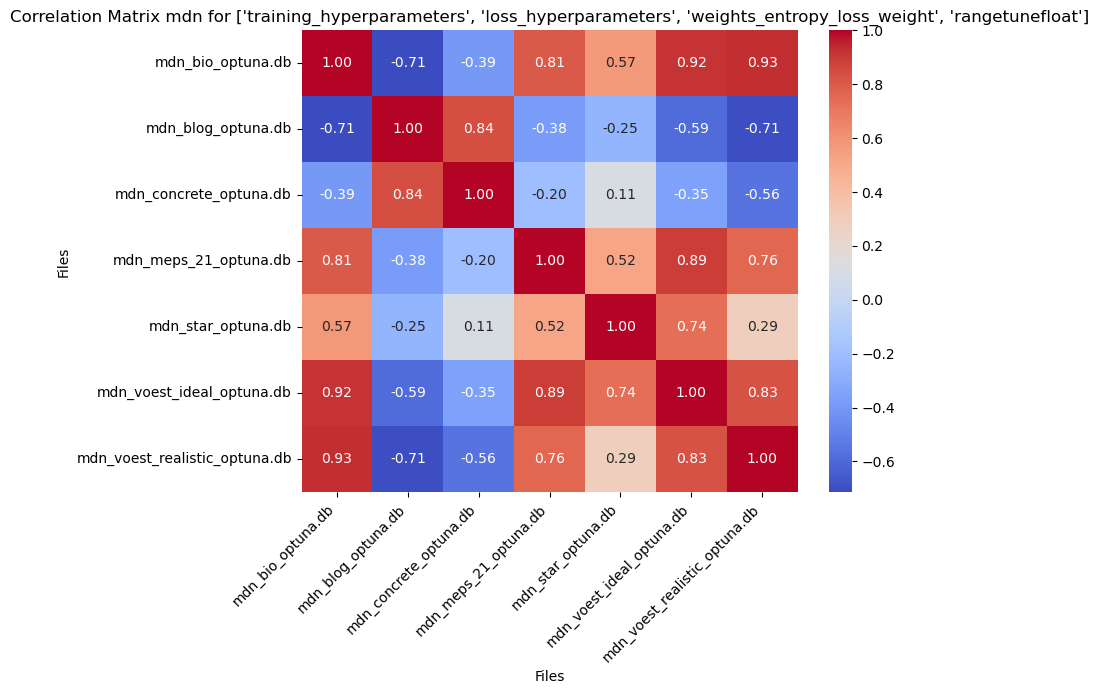

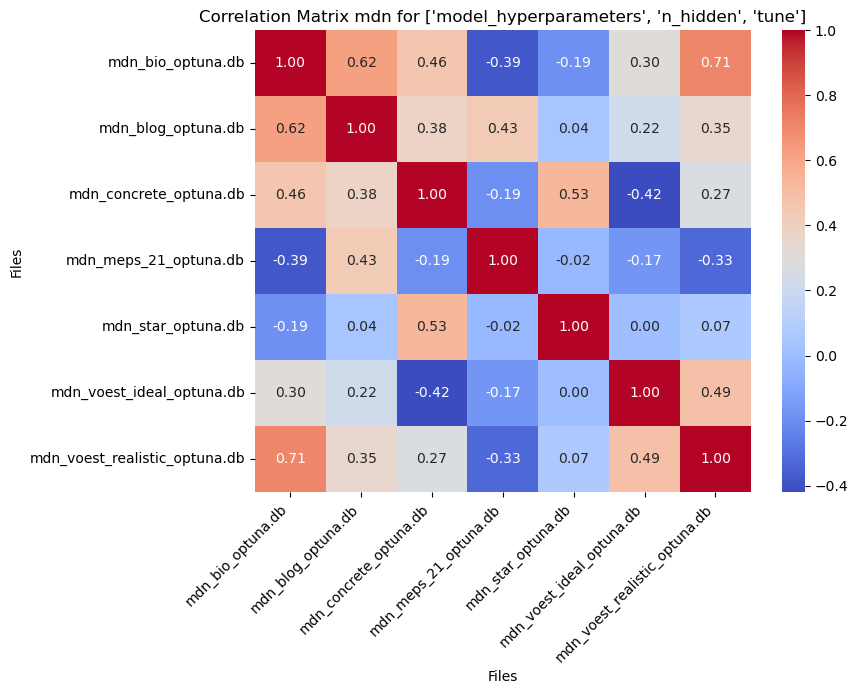

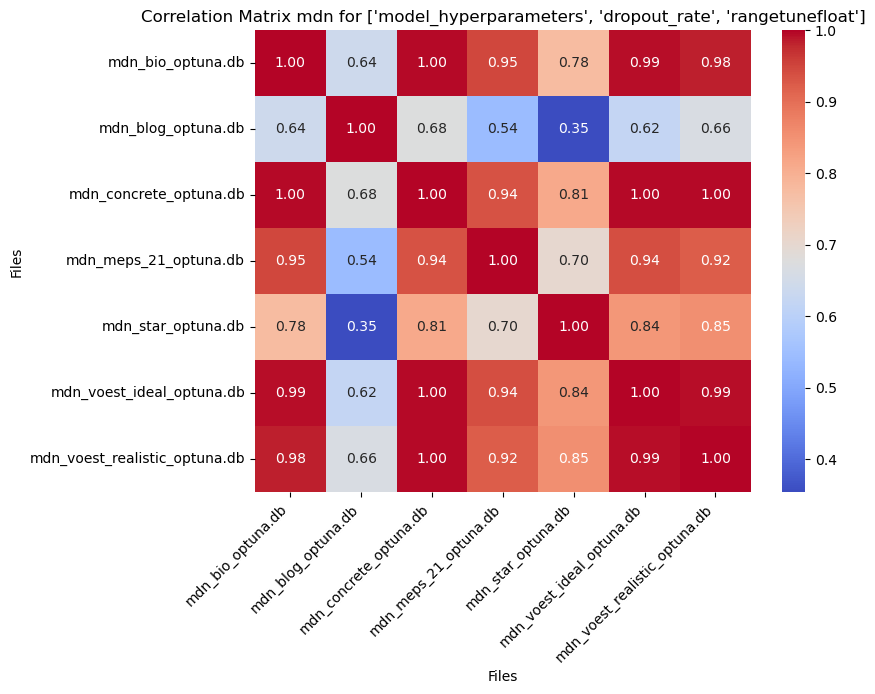

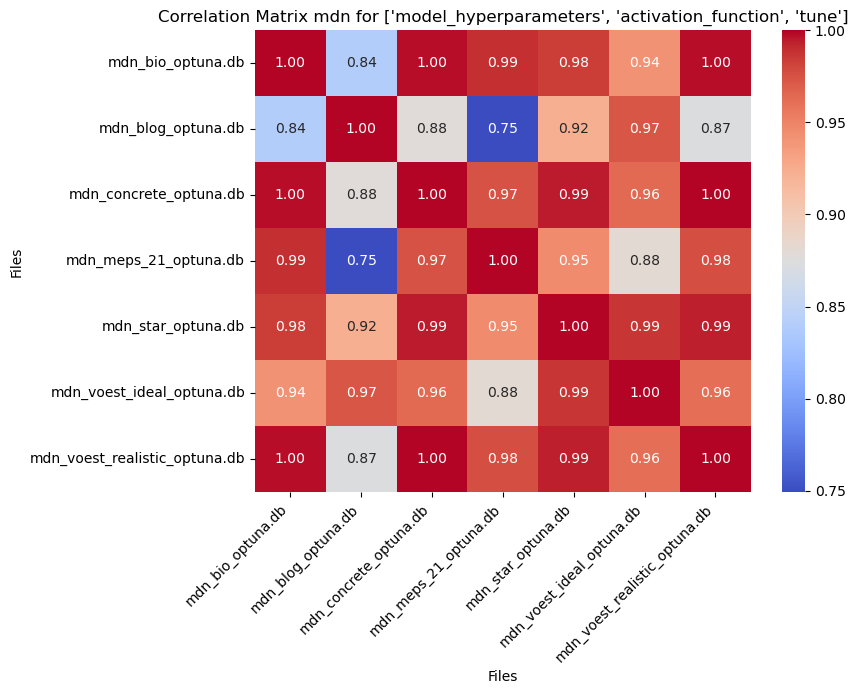

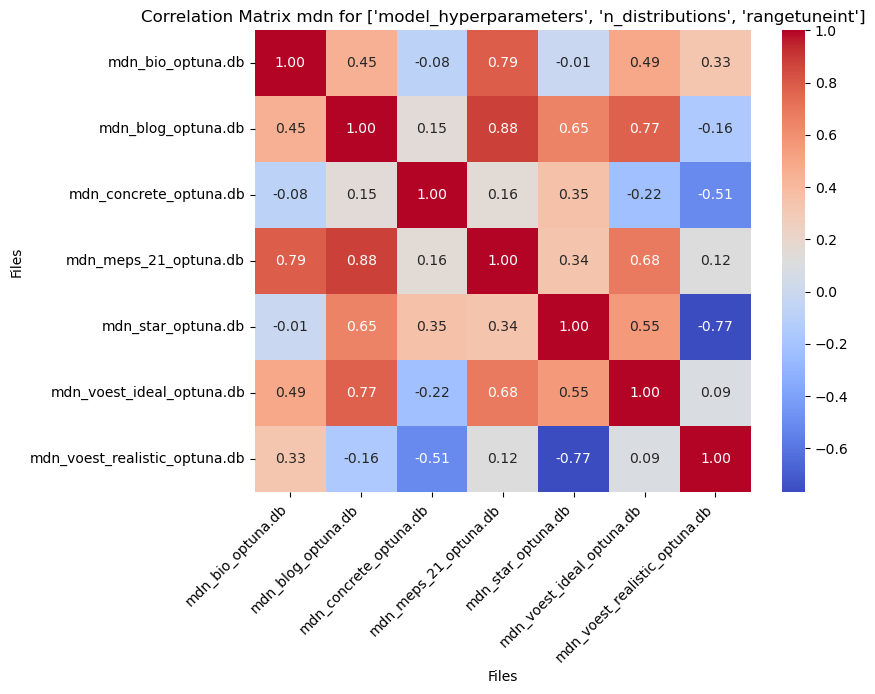

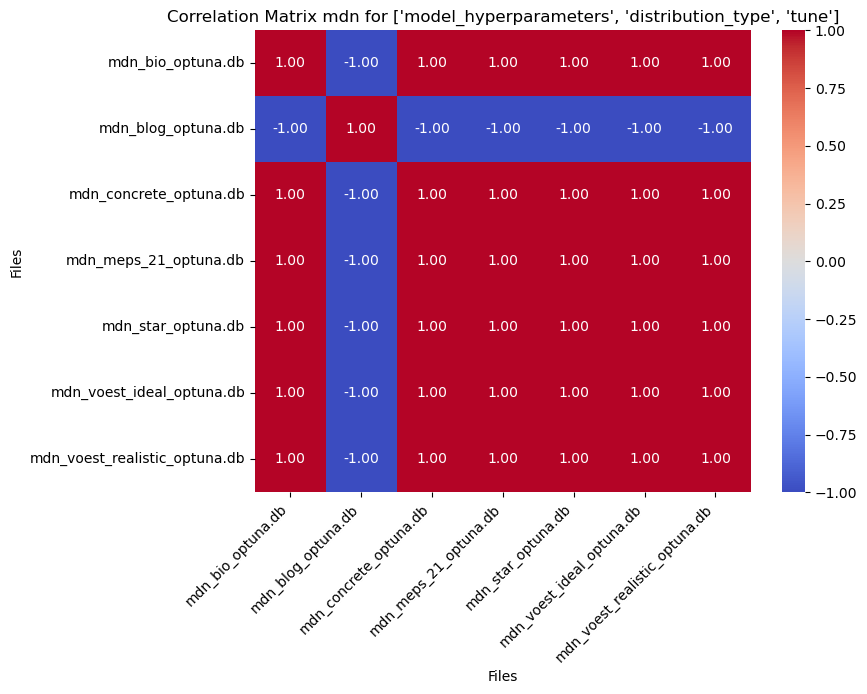

Correlation matrices for kmn


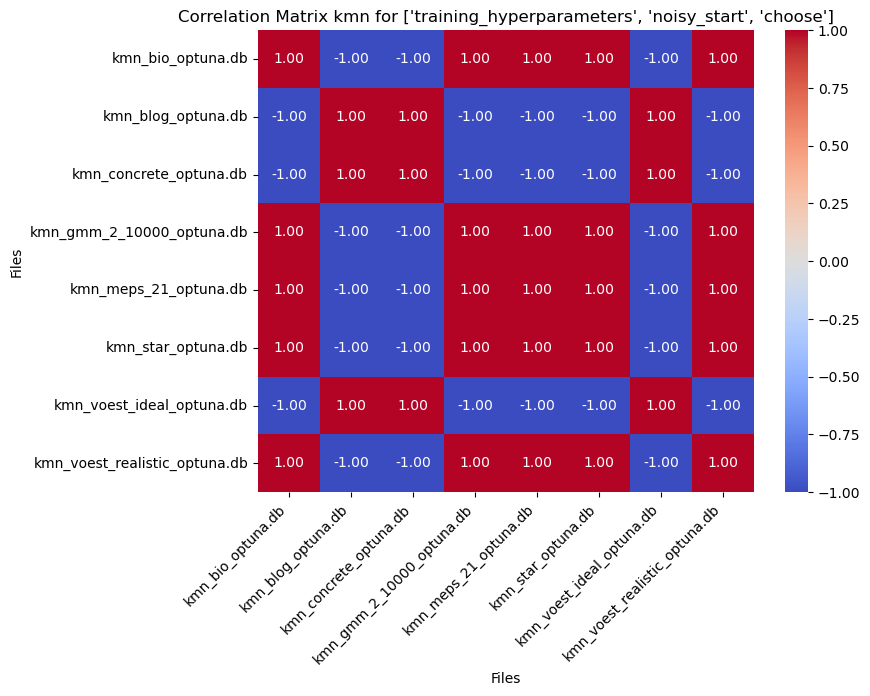

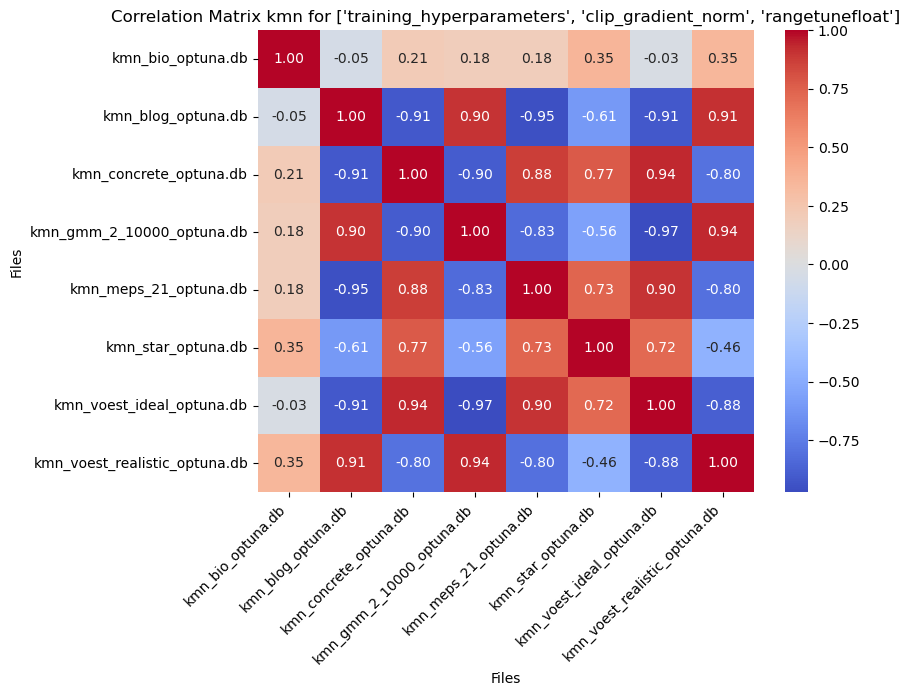

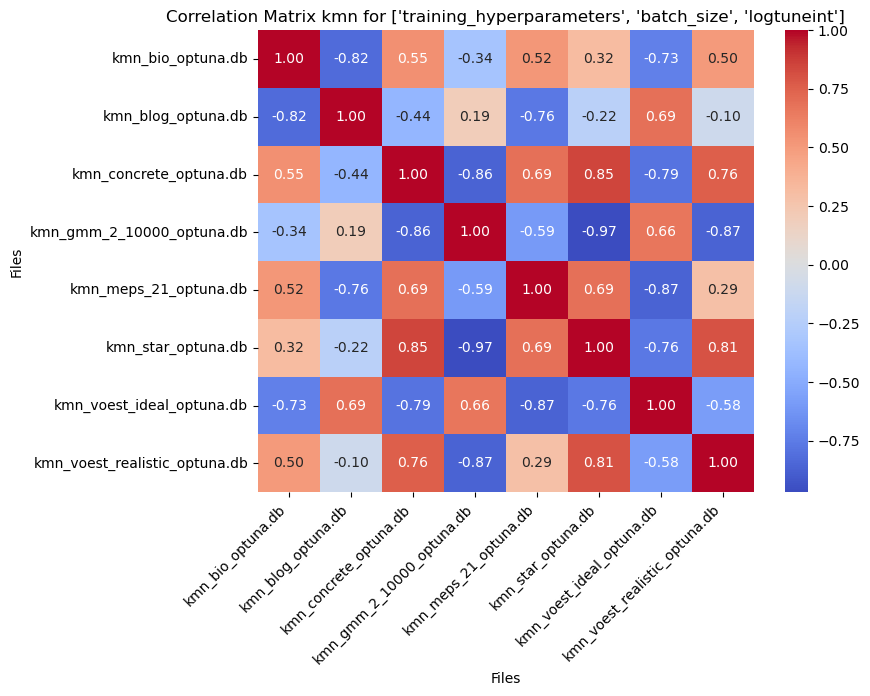

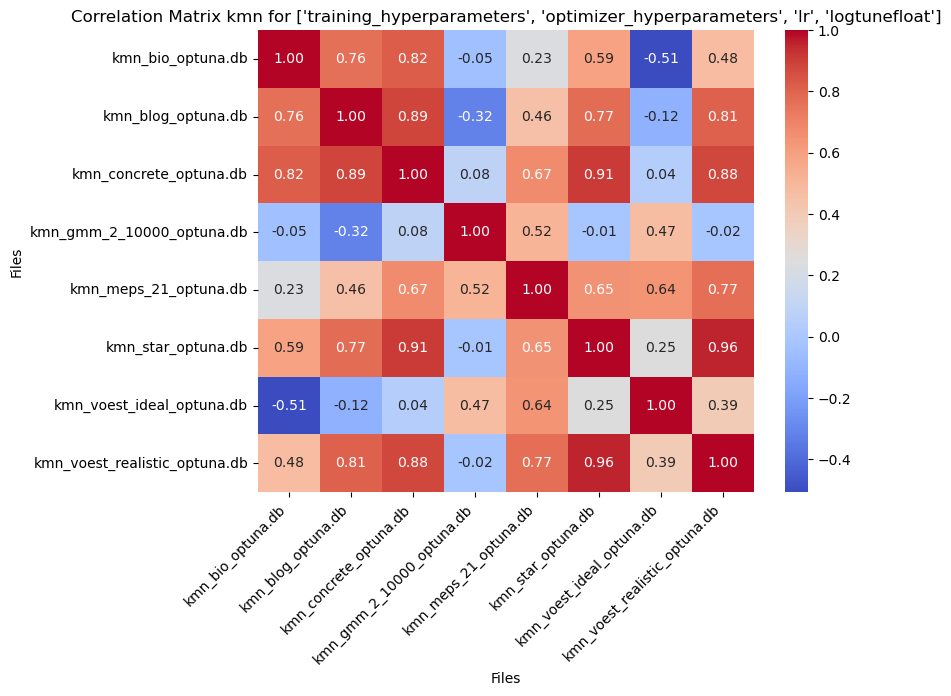

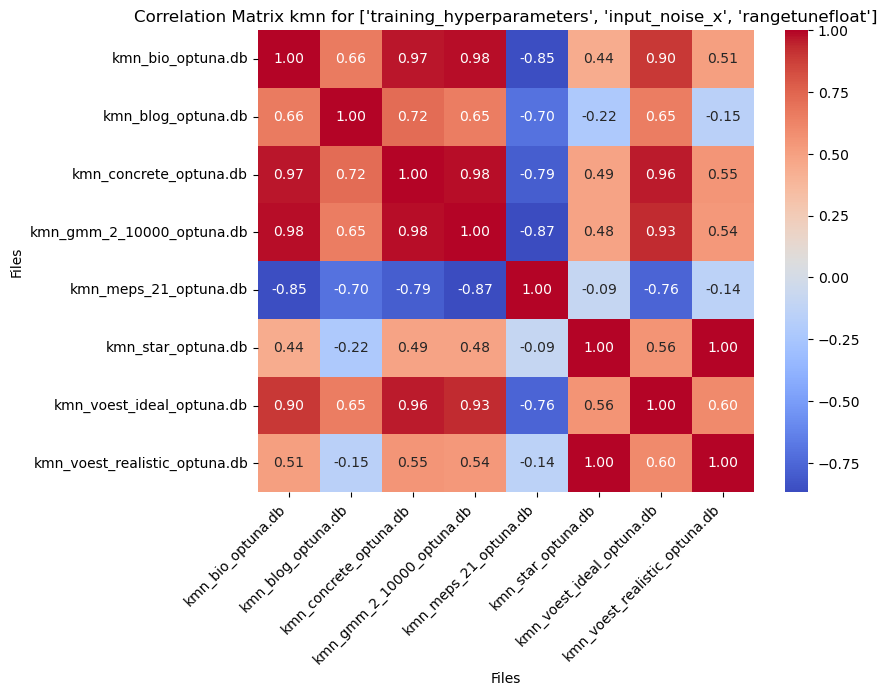

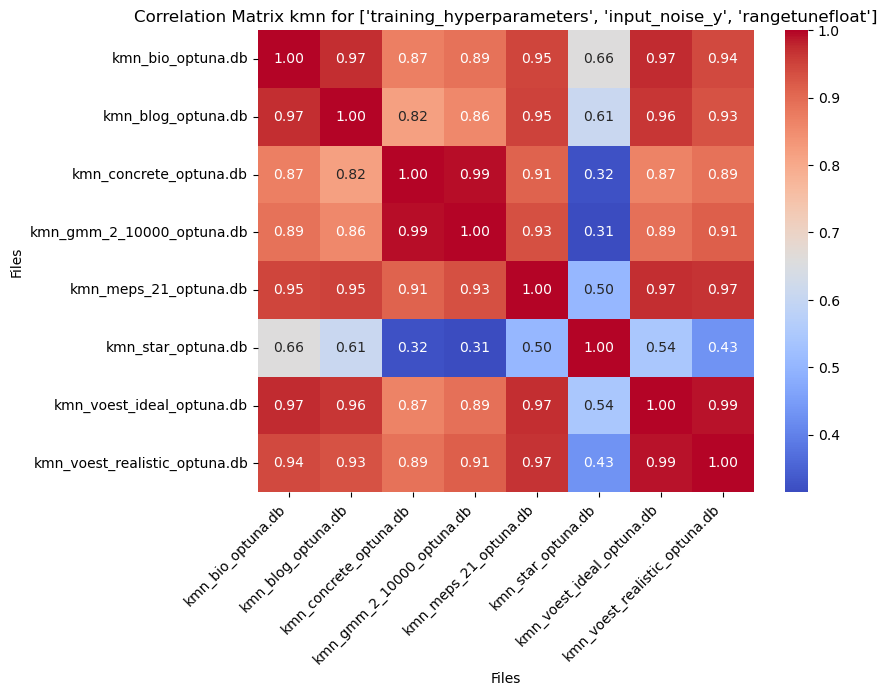

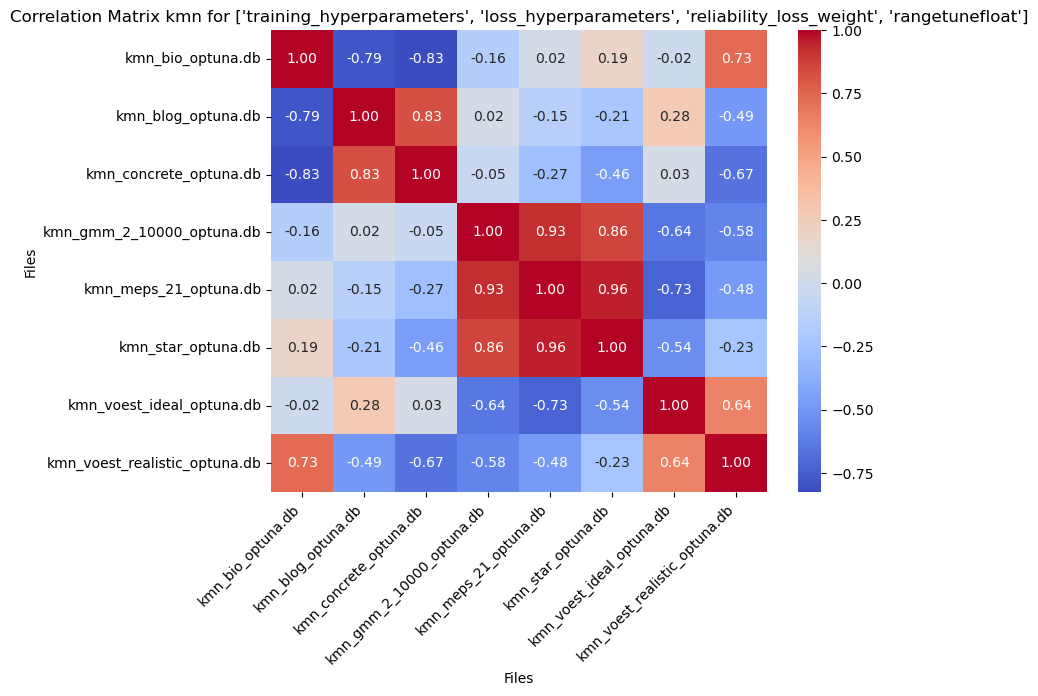

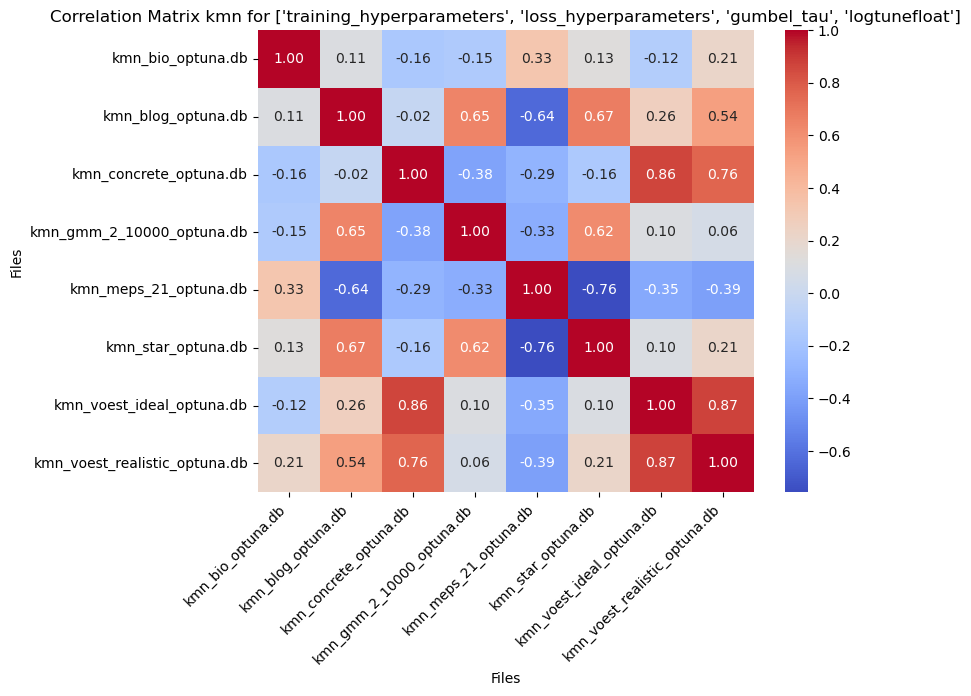

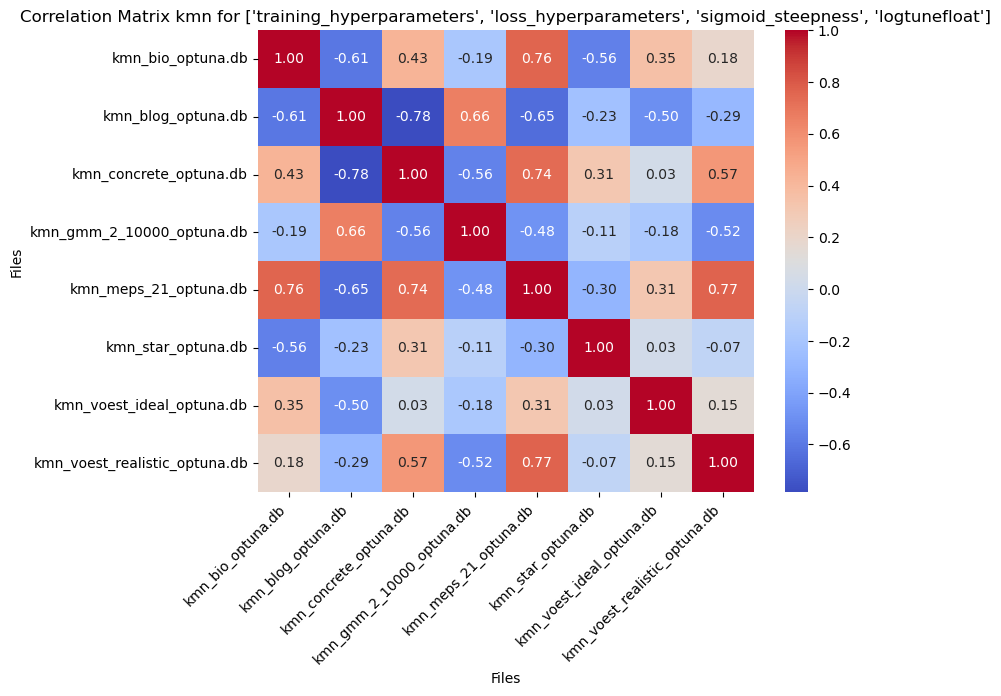

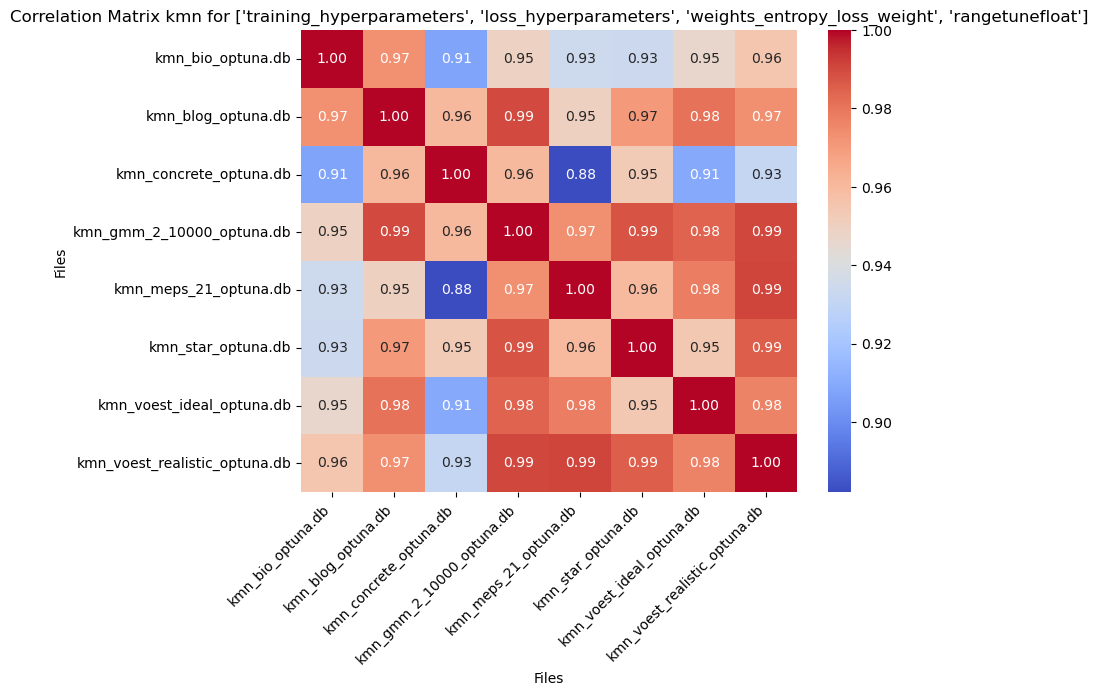

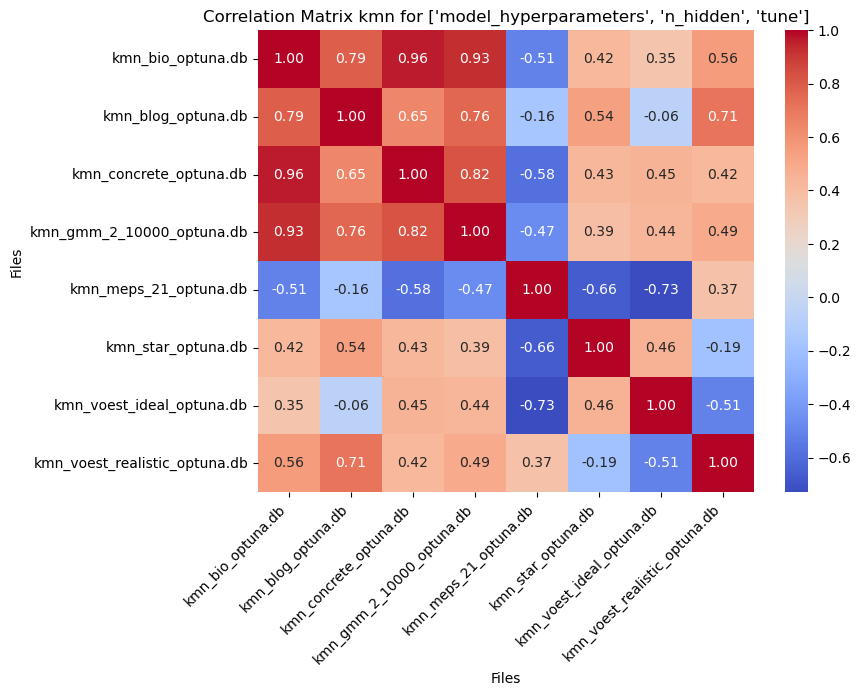

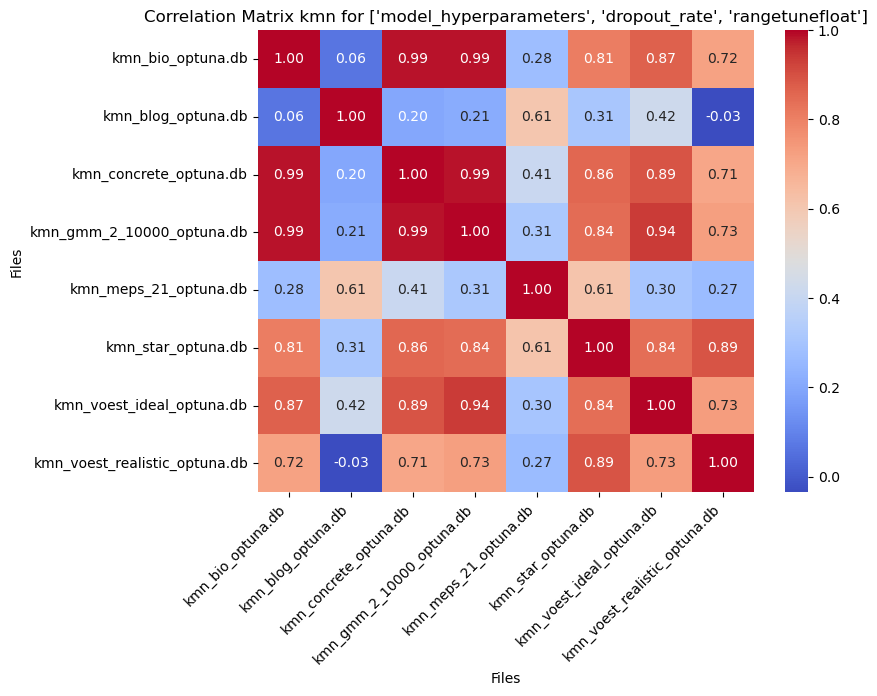

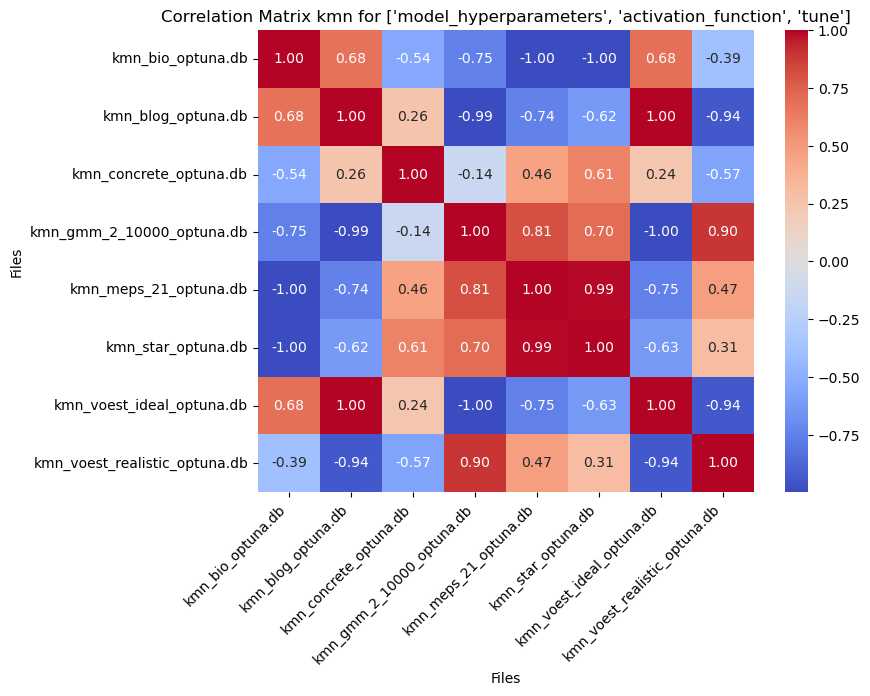

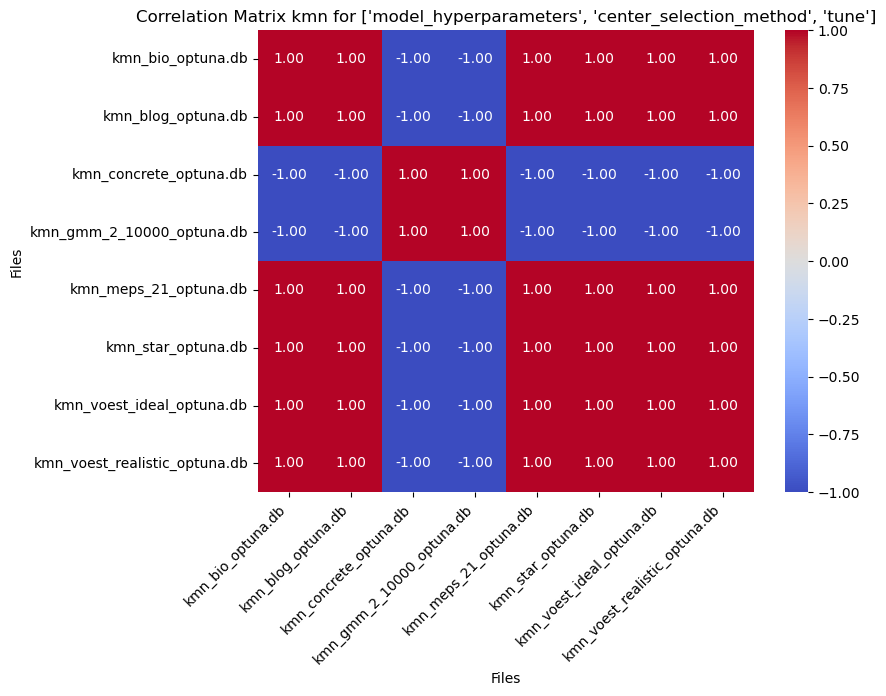

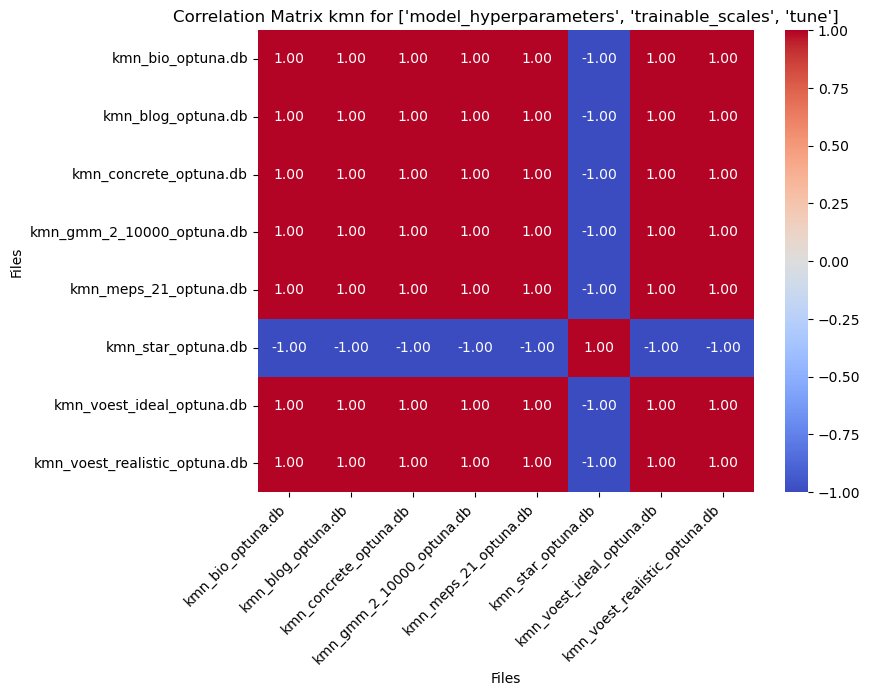

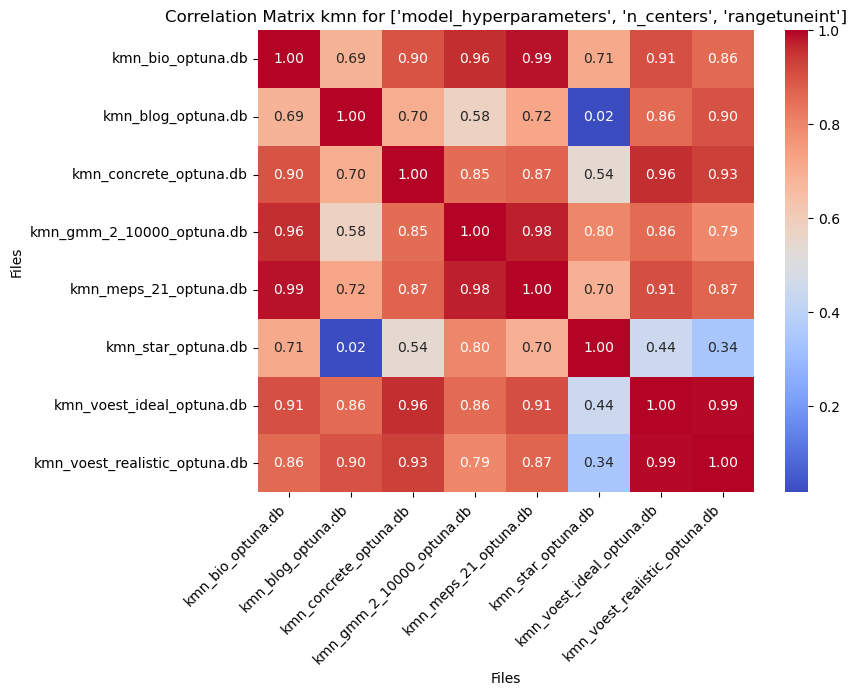

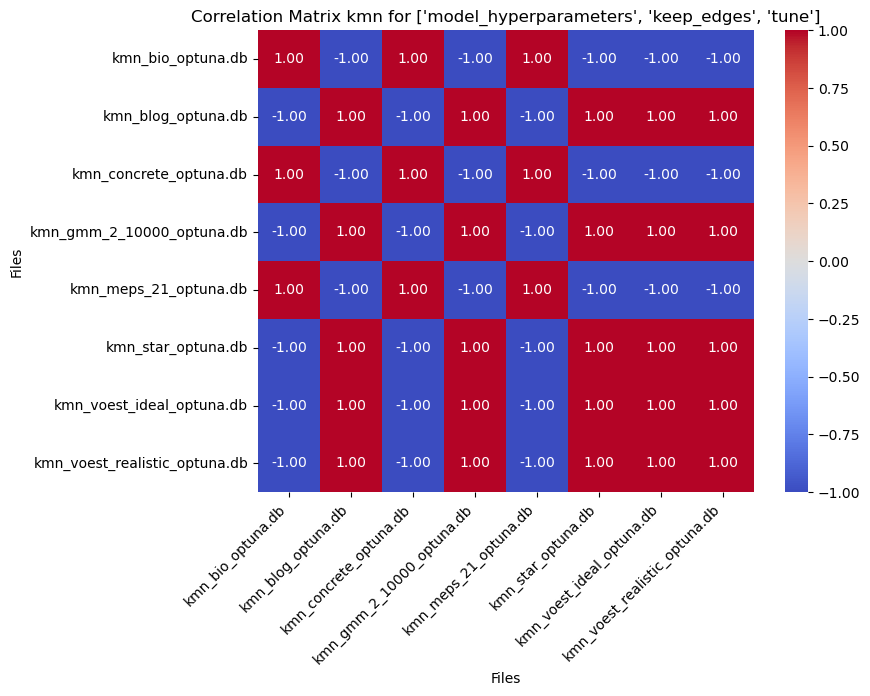

In [15]:
for df_type in [df_mdn, df_kmn]:
    hyperparm_means = {}
    for hyperparam in hyperparam_cols:
        if df_type[hyperparam].hasnans:
            continue
        if len(set(df_type[hyperparam])) < 7:
            file_means = []
            for file in df_type['file'].unique():
                means = df_type[df_type['file'] == file].groupby(hyperparam)["normalized_score"].mean()
                file_means.append(means)
            hyperparm_means[hyperparam] = np.array(file_means).T #transpose to get the hyperparam on the x-axis
                
        else:
            global_min = df_type[hyperparam].min()
            global_max = df_type[hyperparam].max()
            bins = np.linspace(global_min, global_max, num=7)
            bin_means = []
            files = df_type["file"].unique()
            for bin_low, bin_high in zip(bins[:-1], bins[1:]):
                bin_df = df_type[(df_type[hyperparam] <= bin_high) & (bin_low < df_type[hyperparam])]
                # Group by file and get the mean. Reset index to make 'file' a column again
                means = bin_df.groupby("file")["normalized_score"].mean().reset_index()
                # Create a DataFrame of zeros for all files to ensure we have them all
                all_files_means = pd.DataFrame({'file': files, 'normalized_score': np.zeros(len(files))}).set_index('file')
                # Update the scores with the actual means where available
                all_files_means.update(means.set_index('file'), overwrite=True)
                # Append the means to the bin_means list
                bin_means.append(all_files_means['normalized_score'].values)
            hyperparm_means[hyperparam] = np.array(bin_means)
        
    corr_matrices = {}
    for hparam, item in hyperparm_means.items():
        corr_matrices[hparam] = np.corrcoef(item.T)

    files = df_type['file'].unique()
    print(f"Correlation matrices for {df_type['model_type'].iloc[0]}")
    for hparam, corr_matrix in corr_matrices.items():
        plt.figure(figsize=(8, 6))
        ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix {df_type["model_type"].iloc[0]} for {hparam}')
        plt.xlabel('Files')
        plt.ylabel('Files')
        ax.set_xticklabels(files, rotation=45, ha='right')  # Set x-axis tick labels
        ax.set_yticklabels(files, rotation=0)
        plt.show()

## Display a lineplot for each Hyperparam and method w.r.t. score and its hyperparameter value

In [33]:
analyze_key = "normalized_score"

In [34]:
#%matplotlib notebook
import matplotlib
matplotlib.use('TkAgg')
lines = {hyperparam: [] for hyperparam in hyperparam_cols}
fills = {hyperparam: [] for hyperparam in hyperparam_cols}
max_fills = {hyperparam: [] for hyperparam in hyperparam_cols}

def on_pick(event, fig, line_to_legline, fill_to_legline, max_fill_to_legline):
    legline = event.artist
    origline = line_to_legline[legline]
    origfill = fill_to_legline[legline]
    orig_max_fill = max_fill_to_legline[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    origfill.set_visible(vis)
    orig_max_fill.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

for hyperparam in hyperparam_cols:
      # Get default color cycle

    if not df_mdn[hyperparam].hasnans:
        fig, ax = plt.subplots()
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        for idx, file in enumerate(df_mdn['file'].unique()):
            #if df_mdn[hyperparam]
            df_file = df_mdn[df_mdn['file'] == file].sort_values(by=hyperparam)
            # Assuming hyperparameter values are numeric
            rolling_window_size = 20  # Or whatever window size makes sense for your data
            rolling_mean = df_file[analyze_key].rolling(window=rolling_window_size, min_periods=1).mean()
            rolling_std = df_file[analyze_key].rolling(window=rolling_window_size, min_periods=1).std()
            rolling_min = df_file[analyze_key].rolling(window=rolling_window_size, min_periods=1).min()
            rolling_max = df_file[analyze_key].rolling(window=rolling_window_size, min_periods=1).max()
            
            #plt.scatter(df_file[hyperparam], df_file['normalized_score'], label=file, alpha=0.1)
            line, = ax.plot(df_file[hyperparam], rolling_mean, label=f'{file} Moving Avg', color=colors[idx], picker=5)
            lines[hyperparam].append(line)
            fill = ax.fill_between(df_file[hyperparam], rolling_mean-rolling_std, rolling_mean+rolling_std, color=colors[idx], alpha=0.3)
            fills[hyperparam].append(fill)
            max_fill = ax.fill_between(df_file[hyperparam], rolling_min, rolling_max, color=colors[idx], alpha=0.05)
            max_fills[hyperparam].append(max_fill)

        
            
        
        leg = ax.legend(fancybox=True, shadow=True)
        leg.get_frame().set_alpha(0.4)
        
        legline_to_origline = {legline: origline for origline, legline in zip(lines[hyperparam], leg.get_lines())}
        legline_to_origfill = {legline: fill for fill, legline in zip(fills[hyperparam], leg.get_lines())}
        legline_to_origmaxfill = {legline: max_fill for max_fill, legline in zip(max_fills[hyperparam], leg.get_lines())}
        fig.canvas.mpl_connect('pick_event', lambda event: on_pick(event, fig, legline_to_origline, legline_to_origfill, legline_to_origmaxfill))
        for legline in leg.get_lines():
            legline.set_picker(5)

        ax.set_title(f"MDN {hyperparam}")
        ax.set_xlabel(hyperparam)
        ax.set_ylabel(analyze_key)
        ax.grid(True)
        #ax.set_xticks(rotation=45)
        plt.show(block=True)

All

In [17]:
#%matplotlib notebook
import matplotlib
matplotlib.use('TkAgg')
lines = {hyperparam: [] for hyperparam in hyperparam_cols}
fills = {hyperparam: [] for hyperparam in hyperparam_cols}
max_fills = {hyperparam: [] for hyperparam in hyperparam_cols}

def on_pick(event, fig, line_to_legline, fill_to_legline, max_fill_to_legline):
    legline = event.artist
    origline = line_to_legline[legline]
    origfill = fill_to_legline[legline]
    orig_max_fill = max_fill_to_legline[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    origfill.set_visible(vis)
    orig_max_fill.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

for hyperparam in hyperparam_cols:
      # Get default color cycle
    df_dropped = df[~df[hyperparam].isna()]

    if not df_dropped[hyperparam].hasnans:
        fig, ax = plt.subplots()
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = colors + colors
        for idx, file in enumerate(df_dropped['file'].unique()):
            #if df_mdn[hyperparam]
            df_file = df_dropped[df_dropped['file'] == file].sort_values(by=hyperparam)
            # Assuming hyperparameter values are numeric
            rolling_window_size = 20  # Or whatever window size makes sense for your data
            rolling_mean = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).mean()
            rolling_std = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).std()
            rolling_min = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).min()
            rolling_max = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).max()
            
            #plt.scatter(df_file[hyperparam], df_file['normalized_score'], label=file, alpha=0.1)
            line, = ax.plot(df_file[hyperparam], rolling_mean, label=f'{file} Moving Avg', color=colors[idx], picker=5)
            lines[hyperparam].append(line)
            fill = ax.fill_between(df_file[hyperparam], rolling_mean-rolling_std, rolling_mean+rolling_std, color=colors[idx], alpha=0.3)
            fills[hyperparam].append(fill)
            max_fill = ax.fill_between(df_file[hyperparam], rolling_min, rolling_max, color=colors[idx], alpha=0.05)
            max_fills[hyperparam].append(max_fill)

        
            
        
        leg = ax.legend(fancybox=True, shadow=True)
        leg.get_frame().set_alpha(0.4)
        
        legline_to_origline = {legline: origline for origline, legline in zip(lines[hyperparam], leg.get_lines())}
        legline_to_origfill = {legline: fill for fill, legline in zip(fills[hyperparam], leg.get_lines())}
        legline_to_origmaxfill = {legline: max_fill for max_fill, legline in zip(max_fills[hyperparam], leg.get_lines())}
        fig.canvas.mpl_connect('pick_event', lambda event: on_pick(event, fig, legline_to_origline, legline_to_origfill, legline_to_origmaxfill))
        for legline in leg.get_lines():
            legline.set_picker(5)



        ax.set_title(f"KMN {hyperparam}")
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Normalized score')
        ax.grid(True)
        #ax.set_xticks(rotation=45)
        plt.show(block=True)

Traceback (most recent call last):
  File "/home/alexander/miniconda3/envs/uncertainty_prediction/lib/python3.11/site-packages/matplotlib/cbook/__init__.py", line 309, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_223850/2765505490.py", line 60, in <lambda>
    fig.canvas.mpl_connect('pick_event', lambda event: on_pick(event, fig, legline_to_origline, legline_to_origfill, legline_to_origmaxfill))
                                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_223850/2765505490.py", line 10, in on_pick
    origline = line_to_legline[legline]
               ~~~~~~~~~~~~~~~^^^^^^^^^
KeyError: <matplotlib.lines.Line2D object at 0x738372a92210>
Traceback (most recent call last):
  File "/home/alexander/miniconda3/envs/uncertainty_prediction/lib/python3.11/site-packages/matplotlib/cbook/__init__.py", line 309, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_223850/276

KMN

In [10]:
#%matplotlib notebook
import matplotlib
matplotlib.use('TkAgg')
lines = {hyperparam: [] for hyperparam in hyperparam_cols}
fills = {hyperparam: [] for hyperparam in hyperparam_cols}
max_fills = {hyperparam: [] for hyperparam in hyperparam_cols}
rolling_means = {hyperparam: {} for hyperparam in hyperparam_cols}

def on_pick(event, fig, line_to_legline, fill_to_legline, max_fill_to_legline):
    legline = event.artist
    origline = line_to_legline[legline]
    origfill = fill_to_legline[legline]
    orig_max_fill = max_fill_to_legline[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    origfill.set_visible(vis)
    orig_max_fill.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

for hyperparam in hyperparam_cols:
      # Get default color cycle

    if not df_kmn[hyperparam].hasnans:
        fig, ax = plt.subplots()
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        
        rooling_means = {}

        for idx, file in enumerate(df_kmn['file'].unique()):
            #if df_mdn[hyperparam]
            df_file = df_kmn[df_kmn['file'] == file].sort_values(by=hyperparam)
            # Assuming hyperparameter values are numeric
            rolling_window_size = 20  # Or whatever window size makes sense for your data
            rolling_mean = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).mean()
            rolling_std = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).std()
            rolling_min = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).min()
            rolling_max = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).max()

            rolling_means[hyperparam][file] = (rolling_mean.copy(), df_file[hyperparam].copy())
            
            #plt.scatter(df_file[hyperparam], df_file['normalized_score'], label=file, alpha=0.1)
            line, = ax.plot(df_file[hyperparam], rolling_mean, label=f'{file} Moving Avg', color=colors[idx], picker=5)
            lines[hyperparam].append(line)
            fill = ax.fill_between(df_file[hyperparam], rolling_mean-rolling_std, rolling_mean+rolling_std, color=colors[idx], alpha=0.3)
            fills[hyperparam].append(fill)
            max_fill = ax.fill_between(df_file[hyperparam], rolling_min, rolling_max, color=colors[idx], alpha=0.05)
            max_fills[hyperparam].append(max_fill)

        
            
        
        leg = ax.legend(fancybox=True, shadow=True)
        leg.get_frame().set_alpha(0.4)
        
        legline_to_origline = {legline: origline for origline, legline in zip(lines[hyperparam], leg.get_lines())}
        legline_to_origfill = {legline: fill for fill, legline in zip(fills[hyperparam], leg.get_lines())}
        legline_to_origmaxfill = {legline: max_fill for max_fill, legline in zip(max_fills[hyperparam], leg.get_lines())}
        fig.canvas.mpl_connect('pick_event', lambda event: on_pick(event, fig, legline_to_origline, legline_to_origfill, legline_to_origmaxfill))
        for legline in leg.get_lines():
            legline.set_picker(5)



        ax.set_title(f"KMN {hyperparam}")
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Normalized score')
        ax.grid(True)
        #ax.set_xticks(rotation=45)
        plt.show(block=True)

## Analyze hparam values vs. meta data of ds

In [26]:
#%matplotlib notebook

rolling_means = {hyperparam: {} for hyperparam in hyperparam_cols}


for hyperparam in hyperparam_cols:
      # Get default color cycle

    if not df_mdn[hyperparam].hasnans:
        

        for idx, file in enumerate(df_mdn['file'].unique()):
            #if df_mdn[hyperparam]
            df_file = df_mdn[df_mdn['file'] == file].sort_values(by=hyperparam)
            # Assuming hyperparameter values are numeric
            rolling_window_size = 20  # Or whatever window size makes sense for your data
            rolling_mean = df_file["normalized_score"].rolling(window=rolling_window_size, min_periods=1).mean()

            rolling_means[hyperparam][file] = (rolling_mean.copy(), df_file[hyperparam].copy())

        
            
        


In [27]:
mins_hparam_value = []
filenames = []
for file, rolling_mean in rolling_means[hyperparam_cols[2]].items():
    mins_hparam_value.append(rolling_mean[1].to_numpy()[np.argmin(rolling_mean[0].to_numpy())])
    filenames.append(file)

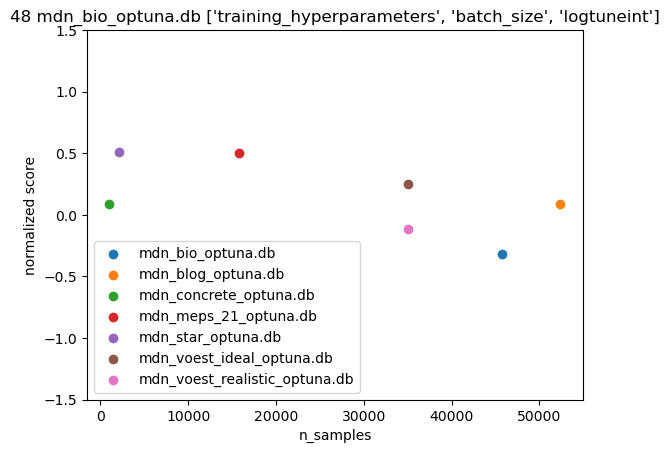

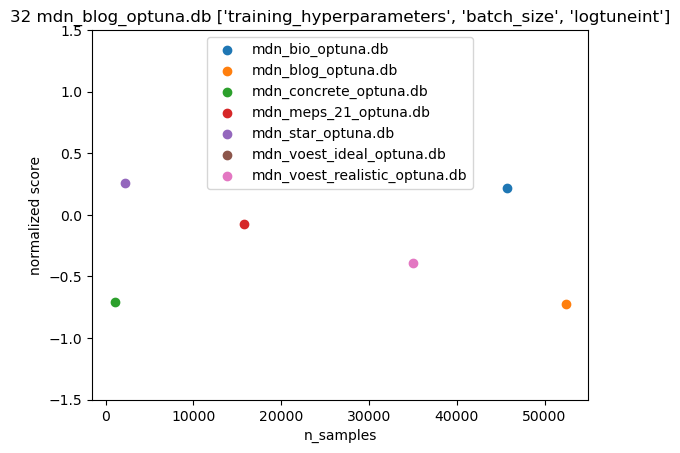

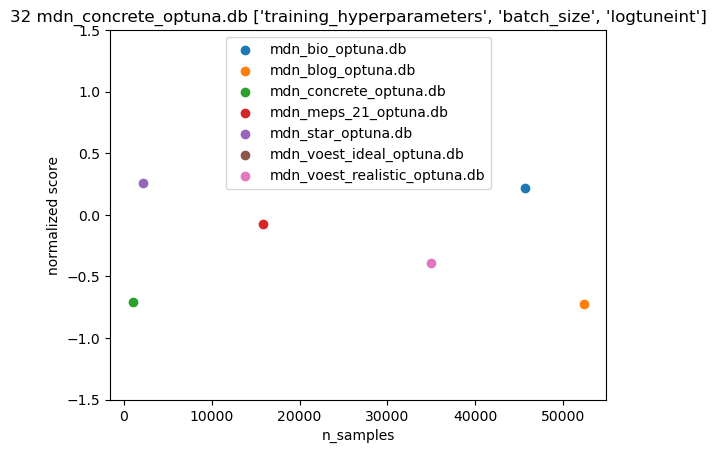

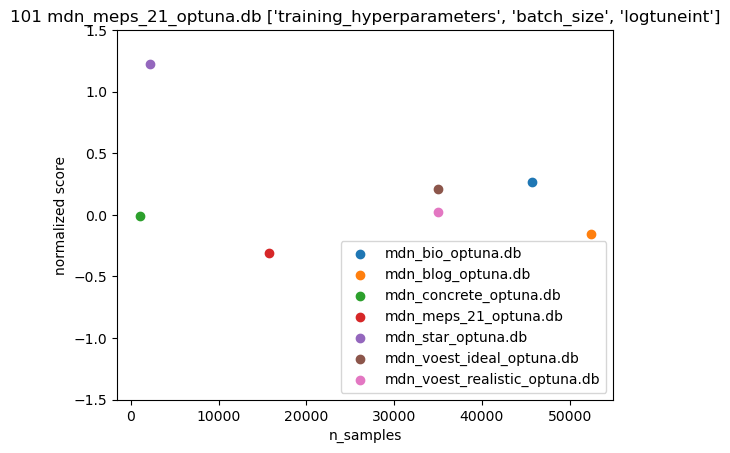

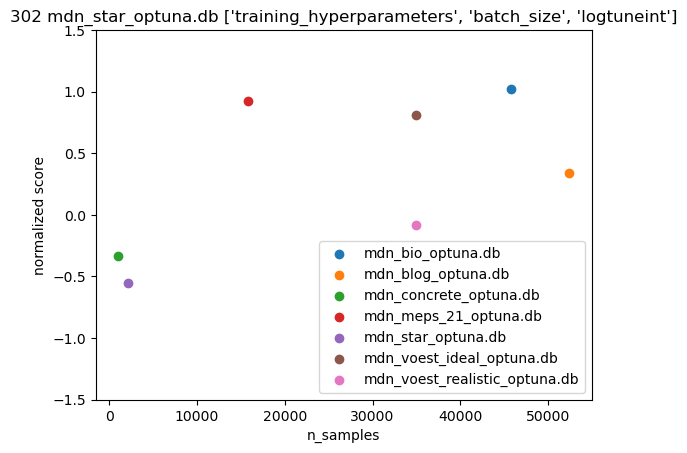

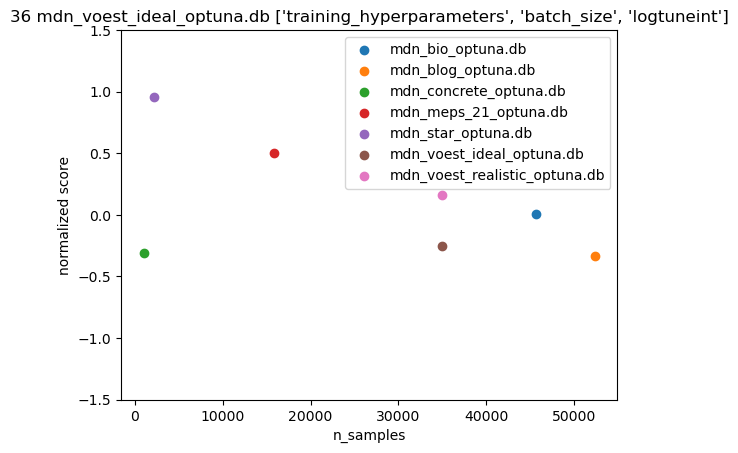

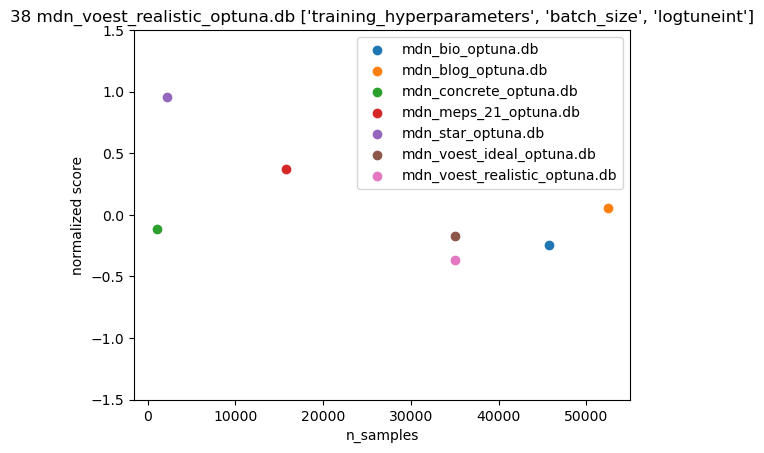

In [28]:
%matplotlib inline
for min, min_filename in zip(mins_hparam_value, filenames):

    plt.figure()
    for file,rolling_mean in rolling_means[hyperparam_cols[2]].items():
        idx = np.argmin(np.abs(rolling_mean[1].to_numpy() - min))
        val = rolling_mean[0].to_numpy()[idx]

        #plt.bar(ds_name_to_meta_info(file)["n_samples"], val)
        plt.scatter(ds_name_to_meta_info(file)["n_samples"], val, label=file)

    plt.title("{} {} {}".format(min, min_filename, hyperparam_cols[2]))
    plt.xlabel("n_samples")
    plt.ylabel("normalized score")
    plt.legend()
    plt.ylim(-1.5, 1.5)
    plt.show()

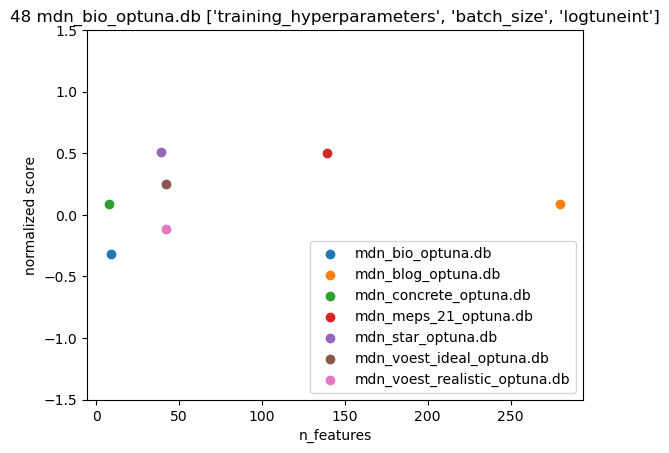

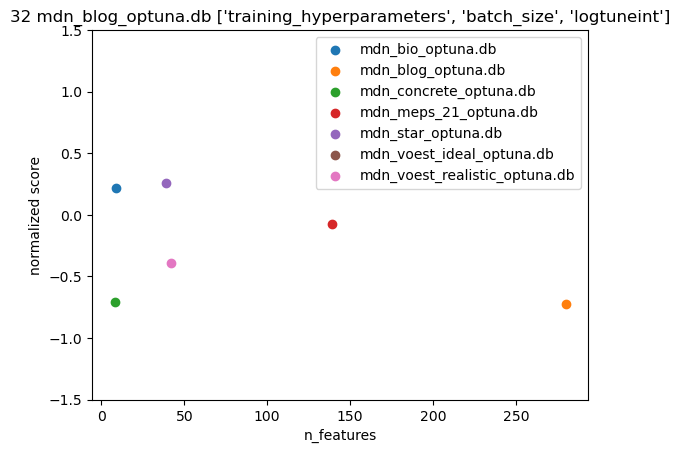

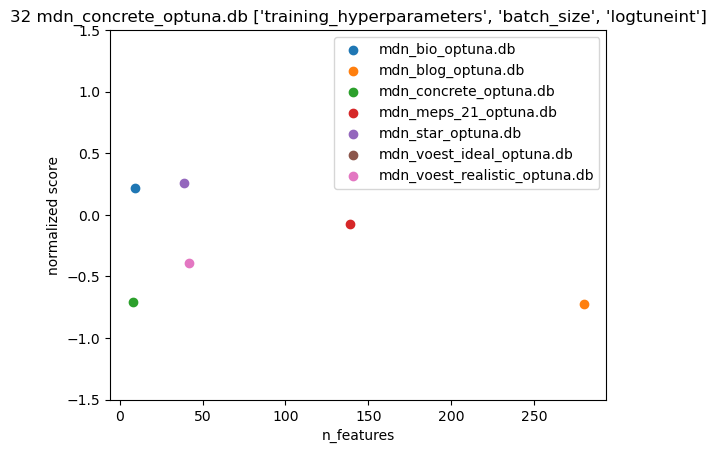

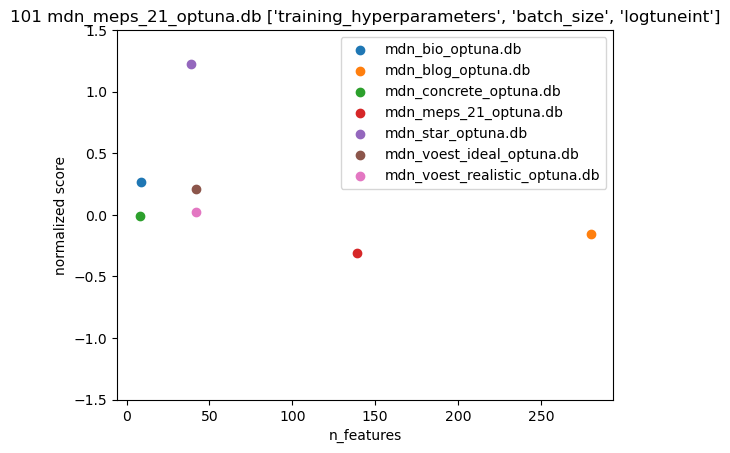

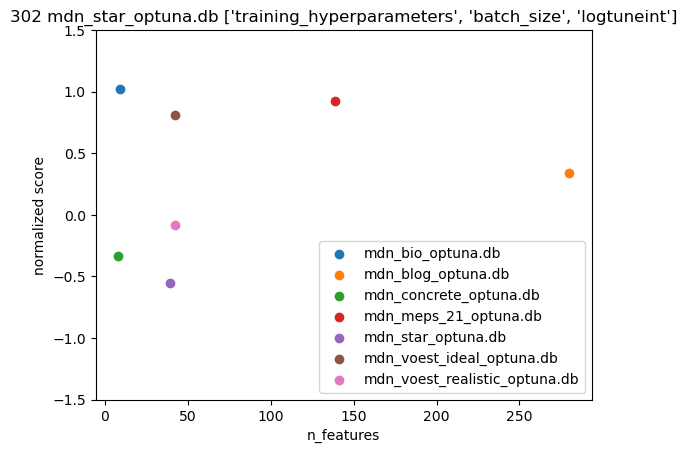

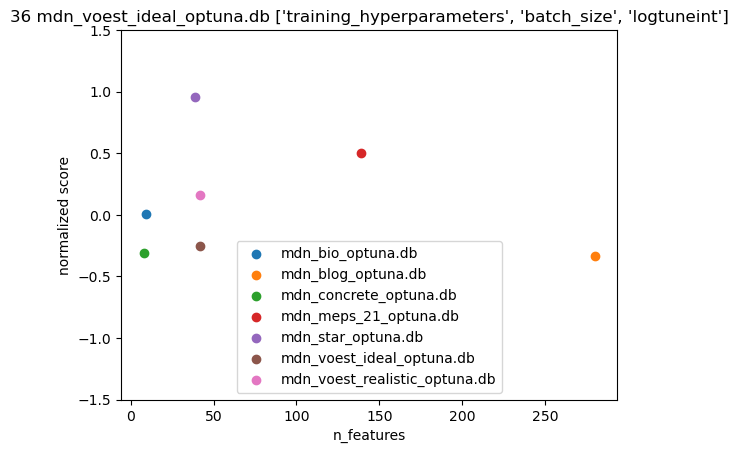

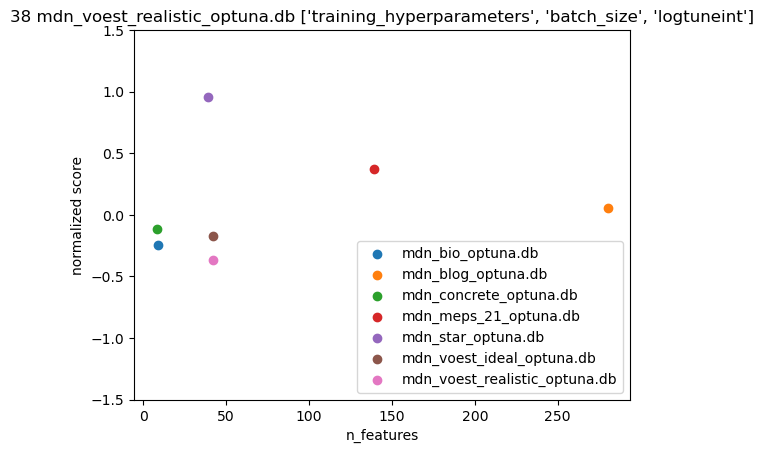

In [29]:
%matplotlib inline
for min, min_filename in zip(mins_hparam_value, filenames):

    plt.figure()
    for file,rolling_mean in rolling_means[hyperparam_cols[2]].items():
        idx = np.argmin(np.abs(rolling_mean[1].to_numpy() - min))
        val = rolling_mean[0].to_numpy()[idx]

        #plt.bar(ds_name_to_meta_info(file)["n_samples"], val)
        plt.scatter(ds_name_to_meta_info(file)["n_features"], val, label=file)

    plt.title("{} {} {}".format(min, min_filename, hyperparam_cols[2]))
    plt.xlabel("n_features")
    plt.ylabel("normalized score")
    plt.legend()
    plt.ylim(-1.5, 1.5)
    plt.show()